In [1]:
# -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import scipy.optimize
%matplotlib widget

In [2]:
# read and plot the trajectory analysis data from Kymotracker
file_name = input('please type in the file name:' ) + '.xlsx'
file_path = input('please type in the file path:')
file = os.path.join(file_path, file_name) 

please type in the file name: Summary of Koff_Kon
please type in the file path: D:\Google Drive\T7 gp2.5 MS_2021\Data&CodeRepository\Fig3_reanalysis_11Mar2022


In [4]:

koff_data = pd.read_excel(file,sheet_name='Sheet2')
print(koff_data.head())
# a1_tot = koff_data['A1/tot'].dropna()
# a1_tot_error = koff_data['error A1/tot'].dropna()
# a2_tot = koff_data['A2/tot'].dropna()
# a2_tot_error = koff_data['error A2/tot'].dropna()
# a3_tot = koff_data['A3/tot'].dropna()
# a3_tot_error = koff_data['error A3/tot'].dropna()

# a2a1 = koff_data['A2/A1'].dropna()
# a2a1_error = koff_data['A2/A1_error'].dropna()
a2a3a1 = koff_data['(A2+A3)/A1'].dropna()
a2a3a1_error = koff_data['(A2+A3)/A1_error'].dropna()

k1 = koff_data['K1'].dropna()
k1_error = koff_data['K1_error'].dropna()
k2 = koff_data['K2'].dropna()
k2_error = koff_data['K2_error'].dropna()
k3 = koff_data['K3'].dropna()
k3_error = koff_data['K3_error'].dropna()

average_k = koff_data['Average K(bulk)'].dropna()
average_k_error = koff_data['Average K(bulk)_error'].dropna()

   Unnamed: 0  Unnamed: 1     A1 A1_error    K1  K1_error    A2  A2_error  \
0         3.0      wt_3pN  16.23     0.93  4.81     0.110  0.14     0.027   
1         6.0      wt_6pN  37.49     2.64  4.92     0.099  0.30     0.029   
2        12.0     wt_12pN  14.96     0.85  2.86     0.066  0.11     0.027   
3        18.0     wt_18pN    NaN      NaN   NaN       NaN   NaN       NaN   
4         3.0  mutant_3pN  18.46     1.37  4.01     0.110  0.21     0.051   

     K2  K2_error  ...  error (A2+A3)  error (A2+A3)/tot  Unnamed: 42  \
0  0.94     0.130  ...       0.027252           0.001735          NaN   
1  1.04     0.075  ...       0.029720           0.000979          NaN   
2  0.53     0.100  ...       0.027177           0.001850          NaN   
3   NaN       NaN  ...       0.001409           0.001409          NaN   
4  0.98     0.150  ...       0.051624           0.002902          NaN   

        A2/A3  Error A2/A3      E3-E2  error (E3-E2)  Unnamed: 47  \
0  181.818182   874.375168  2

In [6]:
x_wt = np.array([3,6,12])
y_wt_fast = k1[:3] 
y_wt_fast_error = k1_error[:3]
y_wt_intermediate = k2[:3] 
y_wt_intermediate_error = k2_error[:3]
y_wt_slow = k3[:3] 
y_wt_slow_error = k3_error[:3]

x_mut = np.array([3,6,12,18])
y_mut_fast = k1[3:8]
y_mut_fast_error = k1_error[3:8]
y_mut_intermediate = k2[3:8]
y_mut_intermediate_error = k2_error[3:8]
y_mut_slow = k3[3:8]
y_mut_slow_error = k3_error[3:8]

# print(y_mut_mean)

In [8]:
x_wt = np.array([1,3])
y_wt_mean = np.array([4.9,2.343])
y_wt_error = np.array([2.87,2.07])
x_labels = ['AT-rich', 'GC-rich']

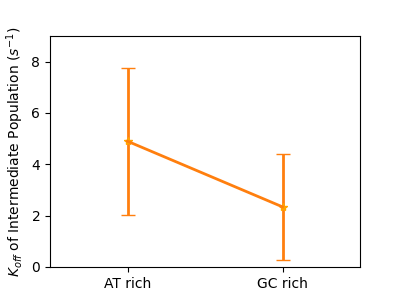

In [9]:
plt.figure(figsize = (4,3))

plt.plot(x_wt, y_wt_mean, '*',color = 'orange',label='WT-Fast')
# plt.fill_between(x_wt, y_wt_mean - y_wt_error, y_wt_mean + y_wt_error,alpha=0.2, label='error band')
plt.errorbar(x_wt, y_wt_mean, y_wt_error, color='tab:orange', ecolor='tab:orange',
             capsize=5, linewidth=2)
plt.ylim(0,9)
plt.xlim(0,4)
# plt.yscale('log')
plt.ylabel('$K_{off}$ of Intermediate Population ($s^{-1}$)')
plt.xticks(x_wt,x_labels)
plt.show()
plt.tight_layout()

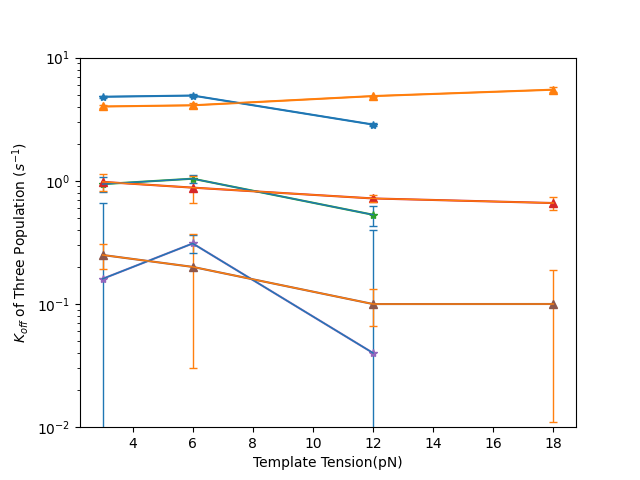

In [31]:
plt.figure(figsize = (4,3))

plt.plot(x_wt, y_wt_fast, '*-',label='WT-Fast')
# plt.fill_between(x_wt, y_wt_mean - y_wt_error, y_wt_mean + y_wt_error,alpha=0.2, label='error band')
plt.errorbar(x_wt, y_wt_fast, y_wt_fast_error, color='tab:blue', ecolor='tab:blue',
             capsize=3, linewidth=1)

plt.plot(x_mut, y_mut_fast, '^-',label='MUT-Fast')
# plt.fill_between(x_mut, y_mut_mean - y_mut_error, y_mut_mean + y_mut_error,alpha=0.2)
plt.errorbar(x_mut, y_mut_fast, y_mut_fast_error, color='tab:orange', ecolor='tab:orange',
             capsize=3, linewidth=1)

plt.plot(x_wt, y_wt_intermediate, '*-',label='WT-Intermediate')
# plt.fill_between(x_wt, y_wt_mean - y_wt_error, y_wt_mean + y_wt_error,alpha=0.2, label='error band')
plt.errorbar(x_wt, y_wt_intermediate, y_wt_intermediate_error, color='tab:blue', ecolor='tab:blue',
             capsize=3, linewidth=1)

plt.plot(x_mut, y_mut_intermediate, '^-',label='MUT-Intermediate')
# plt.fill_between(x_mut, y_mut_mean - y_mut_error, y_mut_mean + y_mut_error,alpha=0.2)
plt.errorbar(x_mut, y_mut_intermediate, y_mut_intermediate_error, color='tab:orange', ecolor='tab:orange',
             capsize=3, linewidth=1)

plt.plot(x_wt, y_wt_slow, '*-',label='WT-Slow')
# plt.fill_between(x_wt, y_wt_mean - y_wt_error, y_wt_mean + y_wt_error,alpha=0.2, label='error band')
plt.errorbar(x_wt, y_wt_slow, y_wt_slow_error, color='tab:blue', ecolor='tab:blue',
             capsize=3, linewidth=1)

plt.plot(x_mut, y_mut_slow, '^-',label='MUT-Slow')
# plt.fill_between(x_mut, y_mut_mean - y_mut_error, y_mut_mean + y_mut_error,alpha=0.2)
plt.errorbar(x_mut, y_mut_slow, y_mut_slow_error, color='tab:orange', ecolor='tab:orange',
             capsize=3, linewidth=1)

plt.yscale ('log')
plt.ylim(0.01,10)
# plt.ylim(1,10)
# plt.xlim(0.1,300)
plt.xlabel('Template Tension(pN)')
plt.ylabel('$K_{off}$ of Three Population ($s^{-1}$)')
# plt.ylabel('Ratio of Specific- to Unspecific-Binding Events')
# plt.xticks([3, 6, 12,18])
# plt.legend(loc ='lower left')
# plt.legend(bbox_to_anchor=(1, 1, 1, 1))
plt.show()
plt.tight_layout()

In [4]:
# Kon plot
kon_data = pd.read_excel(file,sheet_name='Kon')
print(kon_data.head())
kon_median = kon_data['kon_median'].dropna()
lower_error_bar = kon_data['lower_error_bar'].dropna()
upper_error_bar = kon_data['upper_error_bar'].dropna()

x_wt = np.array([3,6,12,18])
y_wt_mean = kon_median[:4]
y_wt_lower_error = lower_error_bar[:4]
y_wt_upper_error = upper_error_bar[:4]

x_mut = np.array([3,6,12,18])
y_mut_mean = kon_median[4:8]
y_mut_lower_error = lower_error_bar[4:8]
y_mut_upper_error = upper_error_bar[4:8]

print(y_mut_mean)

   Unnamed: 0    kon_median  lower_error_bar  upper_error_bar  Unnamed: 4  \
0      wt_3pN  13822.947522      2331.196289      3552.681940         NaN   
1      wt_6pN  13037.523777       540.546719       586.362160         NaN   
2     wt_12pN  10706.052484      1992.482679      2993.343026         NaN   
3     wt_18pN   5585.031739       128.310244       153.115582         NaN   
4  mutant_3pN   5111.247474       623.686092       832.333964         NaN   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0         NaN         NaN         NaN         NaN         NaN          NaN   
1         NaN         NaN         NaN         NaN         NaN          NaN   
2         NaN         NaN         NaN         NaN         NaN          NaN   
3         NaN         NaN         NaN         NaN         NaN          NaN   
4         NaN         NaN         NaN         NaN         NaN          NaN   

   Unnamed: 11  Unnamed: 12  Unnamed: 13  
0          NaN          N

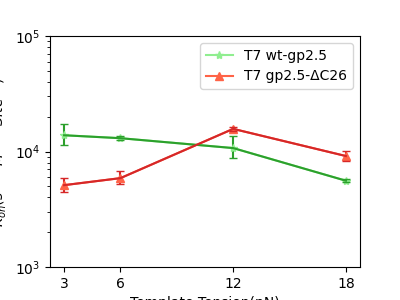

In [6]:
plt.figure(figsize=(4,3))

plt.plot(x_wt, y_wt_mean, '*-',color = 'lightgreen',label='T7 wt-gp2.5')
# plt.fill_between(x_wt, y_wt_mean - y_wt_lower_error, y_wt_mean + y_wt_upper_error,alpha=0.1, label='error band')
# plt.errorbar(x_wt, y_wt_mean, y_wt_error, color='tab:blue', ecolor='tab:blue',
#              capsize=3, linewidth=1, label='mean with error bars')
plt.errorbar(x_wt, y_wt_mean, yerr=[y_wt_lower_error,y_wt_upper_error], color='tab:green', ecolor='tab:green',
             capsize=3, linewidth=1.5)

plt.plot(x_mut, y_mut_mean, '-^',color = 'tomato',label='T7 gp2.5-ΔC26')
# plt.fill_between(x_mut, y_mut_mean - y_mut_lower_error, y_mut_mean + y_mut_upper_error,alpha=0.1)
# plt.errorbar(x_mut, y_mut_mean, y_mut_error, color='tab:orange', ecolor='tab:orange',
#              capsize=3, linewidth=1)

plt.errorbar(x_mut, y_mut_mean, yerr=[y_mut_lower_error,y_mut_upper_error], color='tab:red', ecolor='tab:red',
             capsize=3, linewidth=1.5)

plt.yscale ('log')
plt.ylim(1000,100000)
# plt.xlim(0.1,300)
plt.xlabel('Template Tension(pN)')
plt.ylabel('$K_{on} $($s^{-1}*M^{-1}*Site^{-1}$)')
plt.xticks([3, 6, 12,18])
plt.legend()
plt.show()
plt.tight_layout()
plt.savefig("Fig 3D" +'.png', dpi=300)

Latex subscript:

$x_{2}$

Latex superscript:

$s^{-1}*M^{-1}*Site^{-1}$

In [100]:
# By fitting koff(F)=koff,0 × exp(F/Φoff), the characteristic forces of the dissociation rates (Φoff) can be obtained [https://www.nature.com/articles/ncomms8304#Tab1]
xdata1 = x_mut
ydata1 = y_mut_mean

C:\Users\Stefan\AppData\Local\Temp/ipykernel_6172/3143263619.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-k * x)


[0.11313095 0.0023867 ]
R² = 0.9880178562074053


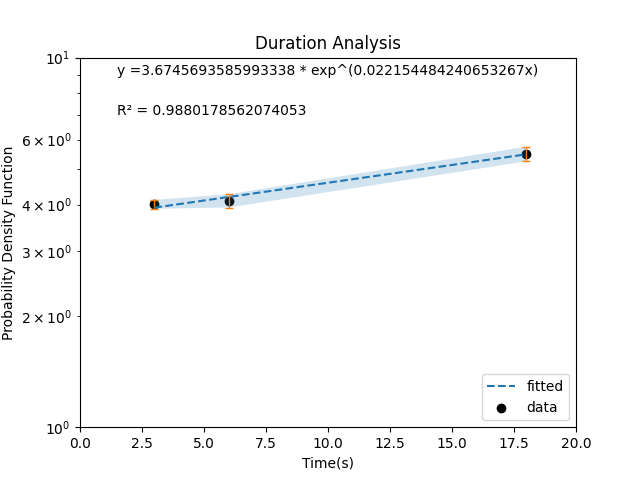

In [116]:
# fit the data with a monoExponential decay curve
def monoExp(x, a, k):
    return a * np.exp(-k * x) 

# perform the fit
popt, pcov = scipy.optimize.curve_fit(monoExp, xdata1, ydata1)
# a is the initial value A1, k is the decay constant
a, k = popt
perr = np.sqrt(np.diag(pcov))
print(perr)

# determine quality of the fit
squaredDiffs = np.square(ydata1 - monoExp(xdata1, a, k))
squaredDiffsFromMean = np.square(ydata1 - np.mean(ydata1))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.figure()
plt.scatter(xdata1, ydata1, color="k", label="data")
plt.fill_between(x_mut, y_mut_mean - y_mut_error, y_mut_mean + y_mut_error,alpha=0.2)
plt.errorbar(x_mut, y_mut_mean, y_mut_error, color='tab:orange', ecolor='tab:orange',
             capsize=3, linewidth=1,linestyle='None')
plt.plot(xdata1, monoExp(xdata1, a, k), '--', label="fitted")

plt.text(1.5,9,'y =' + str(a) + ' * exp^('+ str(-k)+'x)')
plt.text(1.5,7,'R² = ' + str(rSquared))
plt.yscale('log')
plt.ylim(1,10)
plt.xlim(0,20)
plt.legend(loc = 'lower right')
plt.ylabel('Probability Density Function')
plt.xlabel('Time(s)')
plt.title("Duration Analysis")
plt.show()